## Diamonds
### Analyze diamonds by their cut, color, clarity, price, and other attributes

In [57]:
import numpy as np
import pandas as pd# Aprendizado de Comitês
import matplotlib.pyplot as plt
import sklearn

df_diamonds = pd.read_csv('datasets/diamonds.csv')
df_diamonds[df_diamonds.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      int64  
 1   carat       0 non-null      float64
 2   cut         0 non-null      object 
 3   color       0 non-null      object 
 4   clarity     0 non-null      object 
 5   depth       0 non-null      float64
 6   table       0 non-null      float64
 7   price       0 non-null      int64  
 8   x           0 non-null      float64
 9   y           0 non-null      float64
 10  z           0 non-null      float64
dtypes: float64(6), int64(2), object(3)
memory usage: 0.0+ bytes


<AxesSubplot:>

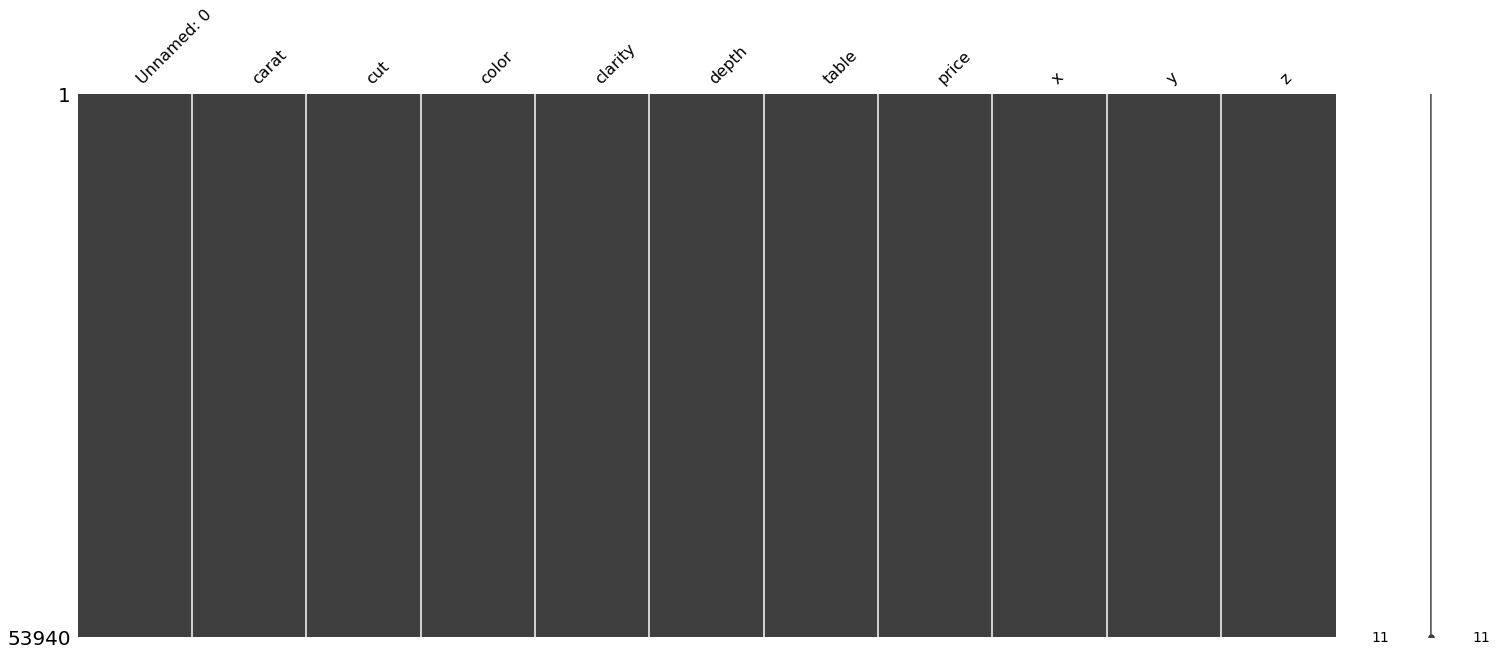

In [58]:
import missingno as msno
msno.matrix(df_diamonds)

In [59]:
df_diamonds.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## Attributes

* ***price*** price in US dollars (\$326--\$18,823)

* ***carat*** weight of the diamond (0.2--5.01)

* ***cut*** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* ***color*** diamond colour, from J (worst) to D (best)

* ***clarity*** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* ***x*** length in mm (0--10.74)

* ***y*** width in mm (0--58.9)

* ***z*** depth in mm (0--31.8)

* ***depth*** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* ***table*** width of top of diamond relative to widest point (43--95)

### Exibi as 10 primeiras linhas do dataset

In [60]:
df_diamonds.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


### Os ultimos 10 

In [61]:
df_diamonds.tail(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53930,53931,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53931,53932,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53932,53933,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47
53933,53934,0.70,Very Good,E,VS2,61.2,59.0,2757,5.69,5.72,3.49
53934,53935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


### Existe valor nulo

In [62]:
df_diamonds.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

### Type class cut | color | clarity

In [63]:
print('CUT')
print(df_diamonds['cut'].unique())
print('COLOR')
print(df_diamonds['color'].unique())
print('CLARITY')
print(df_diamonds['clarity'].unique())

CUT
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
COLOR
['E' 'I' 'J' 'H' 'F' 'G' 'D']
CLARITY
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


### Analyse Exploratory

Attr: Carat
Max : 5.01
Min : 0.2
Variance: 0.22468665982277333
Std : 0.4740112444054184
mean : 0.7979397478680014
median : 0.7
mode: 0    0.3
dtype: float64
1 quartile 25%: 0.4
2 quartile 50%: 0.7
3 quartile 75%: 1.04

IQR: 0.64

Histogram = Positive skewed | prox normal


<AxesSubplot:>

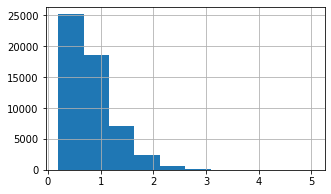

In [64]:
print('Attr: Carat')
df_attr = df_diamonds["carat"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print(f'IQR: {df_attr.quantile(q=0.75)-df_attr.quantile(q=0.25)}\n')
print('Histogram = Positive skewed | prox normal')
df_attr.hist(figsize=(5,3))

Attr: Depth
Max : 79.0
Min : 43.0
Variance: 2.0524038431766978
Std : 1.432621318833661
mean : 61.749404894327036
median : 61.8
mode: 0    62.0
dtype: float64
1 quartile 25%: 61.0
2 quartile 50%: 61.8
3 quartile 75%: 62.5

Histogram = Positive skewed


<AxesSubplot:>

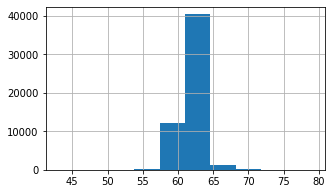

In [65]:
print('Attr: Depth')
df_attr = df_diamonds["depth"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')

df_attr.hist(figsize=(5,3))

Attr: Table
Max : 95.0
Min : 43.0
Variance: 4.9929480753375515
Std : 2.2344905628213225
mean : 57.45718390804598
median : 57.0
mode: 0    56.0
dtype: float64
1 quartile 25%: 56.0
2 quartile 50%: 57.0
3 quartile 75%: 59.0

Histogram = Positive skewed


<AxesSubplot:>

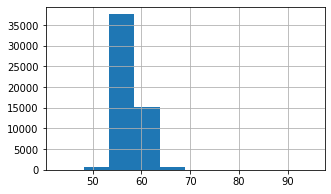

In [66]:
print('Attr: Table')
df_attr = df_diamonds["table"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')
df_attr.hist(figsize=(5,3))

Attr: Price
Max : 18823
Min : 326
Variance: 15915629.42430145
Std : 3989.439738146379
mean : 3932.799721913237
median : 2401.0
mode: 0    605
dtype: int64
1 quartile 25%: 950.0
2 quartile 50%: 2401.0
3 quartile 75%: 5324.25

Histogram = Negatively skewed


<AxesSubplot:>

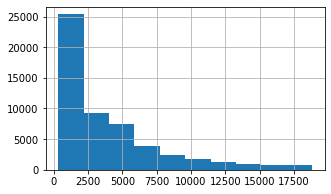

In [67]:
print('Attr: Price')
df_attr = df_diamonds["price"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Negatively skewed')
df_attr.hist(figsize=(5,3))

Attr: X
Max : 10.74
Min : 0.0
Variance: 1.258347173044451
Std : 1.1217607467924928
mean : 5.731157211716722
median : 5.7
mode: 0    4.37
dtype: float64
1 quartile 25%: 4.71
2 quartile 50%: 5.7
3 quartile 75%: 6.54

Histogram = Positive skewed


<AxesSubplot:>

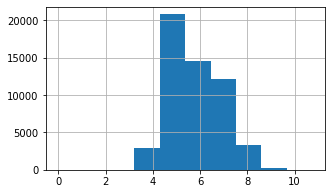

In [68]:
print('Attr: X')
df_attr = df_diamonds["x"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')
df_attr.hist(figsize=(5,3))

Attr: Y
Max : 58.9
Min : 0.0
Variance: 1.3044716138353198
Std : 1.1421346741235552
mean : 5.734525954764553
median : 5.71
mode: 0    4.34
dtype: float64
1 quartile 25%: 4.72
2 quartile 50%: 5.71
3 quartile 75%: 6.54

Histogram = Positive skewed


<AxesSubplot:>

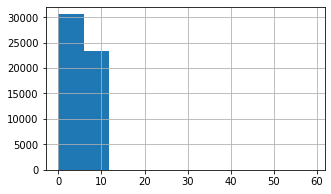

In [69]:
print('Attr: Y')
df_attr = df_diamonds["y"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')

df_attr.hist(figsize=(5,3))

Attr: Z
Max : 31.8
Min : 0.0
Variance: 0.4980108625865512
Std : 0.7056988469499941
mean : 3.5387337782721544
median : 3.53
mode: 0    2.7
dtype: float64
1 quartile 25%: 2.91
2 quartile 50%: 3.53
3 quartile 75%: 4.04

Histogram = Positive skewed


<AxesSubplot:>

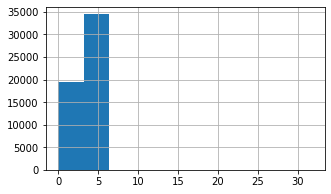

In [70]:
print('Attr: Z')
df_attr = df_diamonds["z"]
print(f'Max : {df_attr.max()}')
print(f'Min : {df_attr.min()}')
print(f'Variance: {df_attr.var()}')
print(f'Std : {df_attr.std()}')
print(f'mean : {df_attr.mean()}')
print(f'median : {df_attr.median()}')
print(f'mode: {df_attr.mode()}')
print(f'1 quartile 25%: {df_attr.quantile(q=0.25)}')
print(f'2 quartile 50%: {df_attr.quantile(q=0.50)}')
print(f'3 quartile 75%: {df_attr.quantile(q=0.75)}\n')
print('Histogram = Positive skewed')

df_attr.hist(figsize=(5,3))

### Boxplot

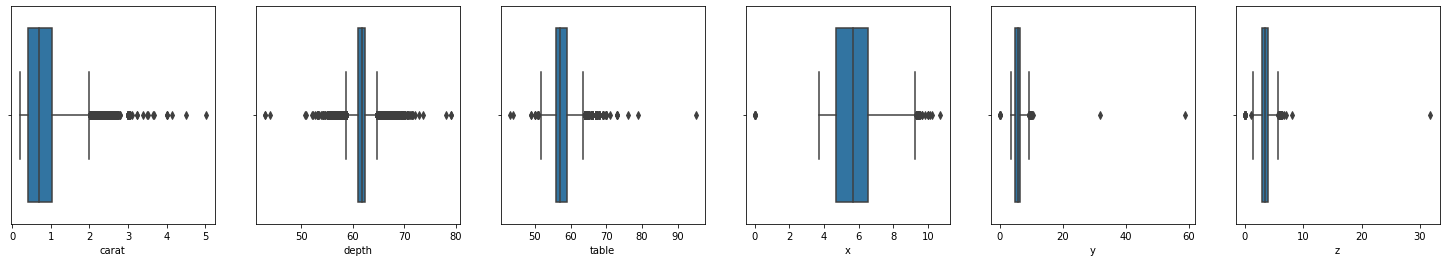

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt


df_number_type = df_diamonds.select_dtypes(exclude='O')
df_without_price = df_number_type.drop("price", axis = 'columns')

plt.figure(figsize=(30,4))
for i,feature in enumerate(df_without_price.columns[1:].tolist(),1):
    plt.subplot(1,7,i)
    sns.boxplot(x=df_number_type[feature])

        
plt.show()

### BoxPlot by Class 

## Class Cut

<AxesSubplot:xlabel='cut', ylabel='count'>

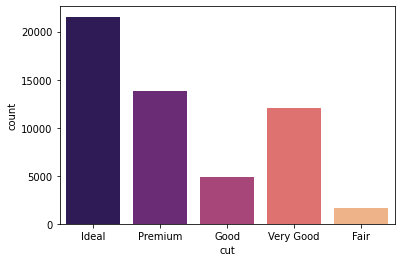

In [72]:
sns.countplot(x='cut',data=df_diamonds,palette="magma")

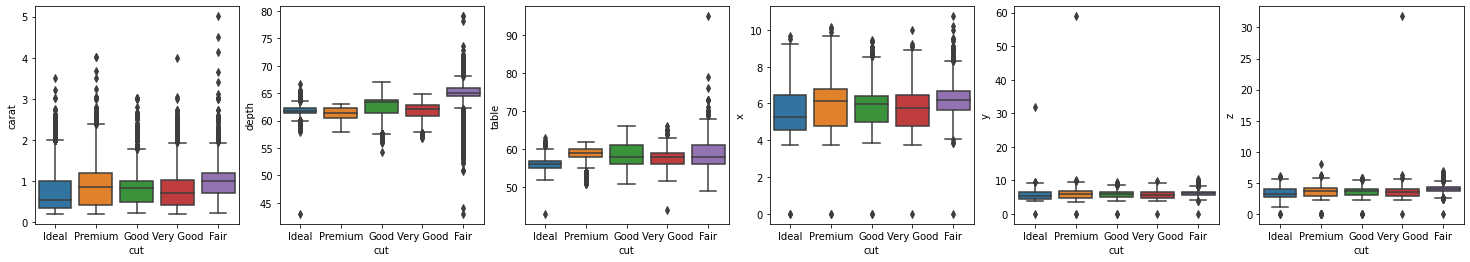

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt


df_number_type = df_diamonds.select_dtypes(exclude='O')
df_without_price = df_number_type.drop("price", axis = 'columns')

plt.figure(figsize=(30,4))
for i,feature in enumerate(df_without_price.columns[1:].tolist(),1):
    plt.subplot(1,7,i)
    sns.boxplot(x='cut',y=feature,data=df_diamonds)        
plt.show()

## Clarity

<AxesSubplot:xlabel='clarity', ylabel='count'>

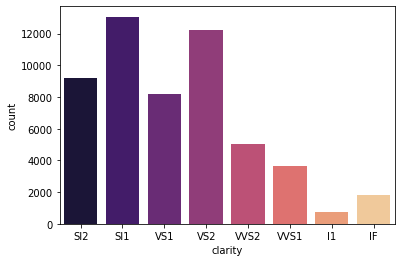

In [74]:
sns.countplot(x='clarity',data=df_diamonds,palette="magma")

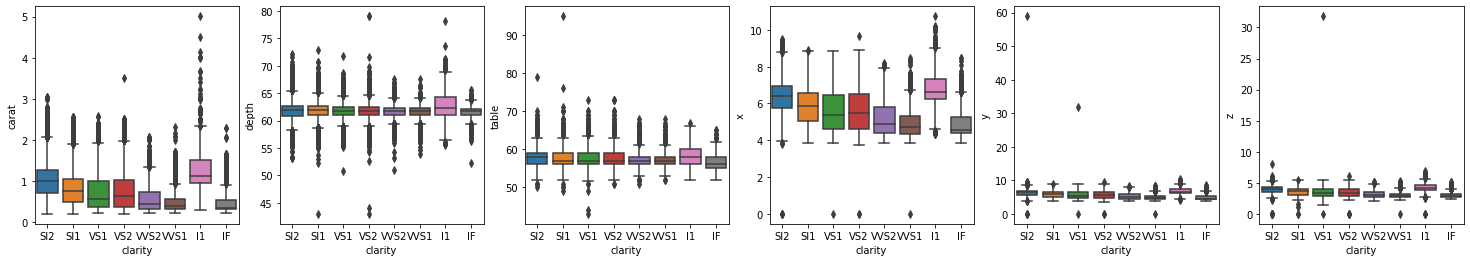

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt


df_number_type = df_diamonds.select_dtypes(exclude='O')
df_without_price = df_number_type.drop("price", axis = 'columns')

plt.figure(figsize=(30,4))
for i,feature in enumerate(df_without_price.columns[1:].tolist(),1):
    plt.subplot(1,7,i)
    sns.boxplot(x='clarity',y=feature,data=df_diamonds)        
plt.show()

## Color

<AxesSubplot:xlabel='color', ylabel='count'>

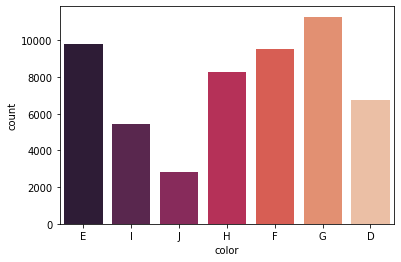

In [76]:
sns.countplot(x='color',data=df_diamonds,palette="rocket")


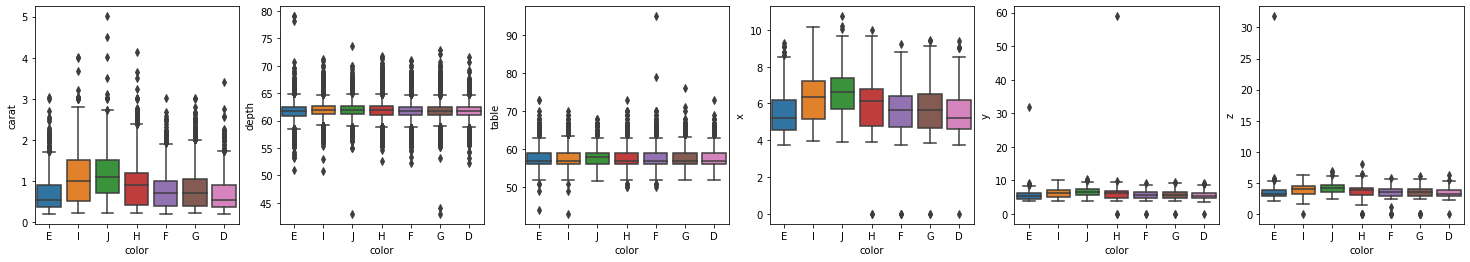

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt


df_number_type = df_diamonds.select_dtypes(exclude='O')
df_without_price = df_number_type.drop("price", axis = 'columns')

plt.figure(figsize=(30,4))
for i,feature in enumerate(df_without_price.columns[1:].tolist(),1):
    plt.subplot(1,7,i)
    sns.boxplot(x='color',y=feature,data=df_diamonds)        
plt.show()

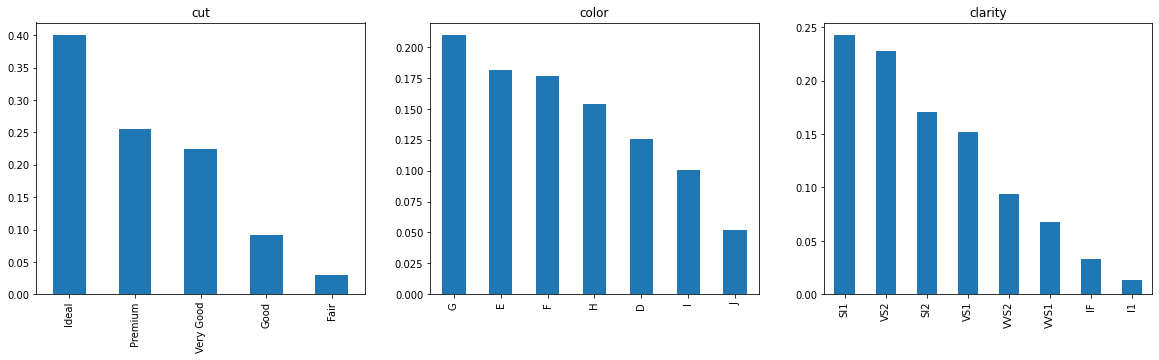

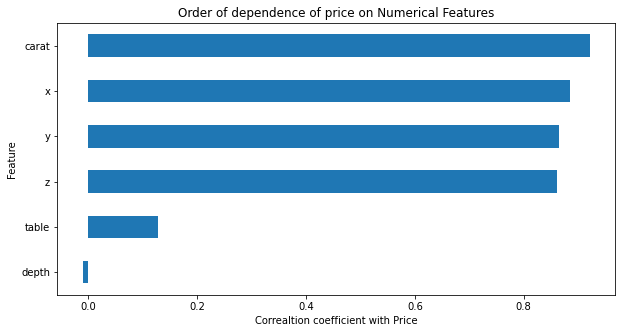

In [78]:
plt.figure(figsize=(20,5))
for i,feature in enumerate(df_diamonds.select_dtypes(include='O').columns.tolist(),1):
    plt.subplot(1,3,i)
    df_diamonds[feature].value_counts(normalize=True).plot.bar()
    plt.title(feature)
    
plt.figure(figsize=(10,5))
df_diamonds.corr()['price'].sort_values()[1:-1].plot.barh()
plt.title('Order of dependence of price on Numerical Features')
plt.xlabel('Correaltion coefficient with Price')
plt.ylabel('Feature')
plt.show()

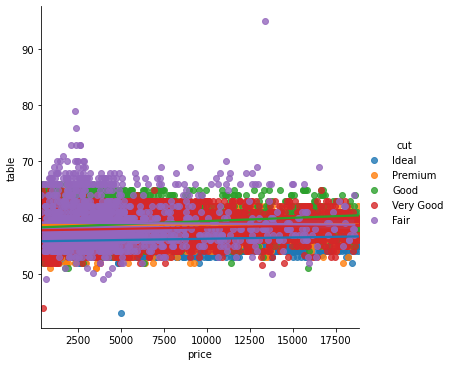

In [79]:
# Color-coded scatter plot with regression lines
sns.lmplot(y='table', x='price', hue='cut', data=df_diamonds)

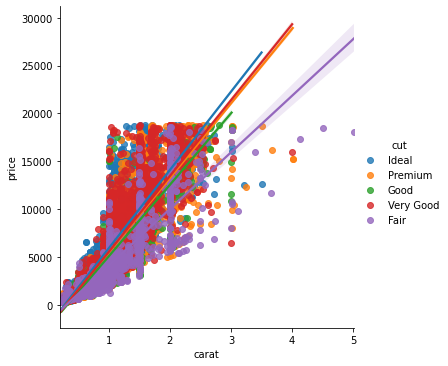

In [80]:
# Color-coded scatter plot with regression lines
sns.lmplot(x='carat', y='price', hue='cut', data=df_diamonds)

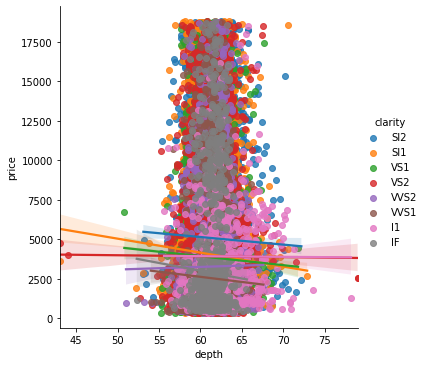

In [81]:
# Color-coded scatter plot with regression lines
sns.lmplot(x='depth', y='price', hue='clarity', data=df_diamonds)

### Heatmap

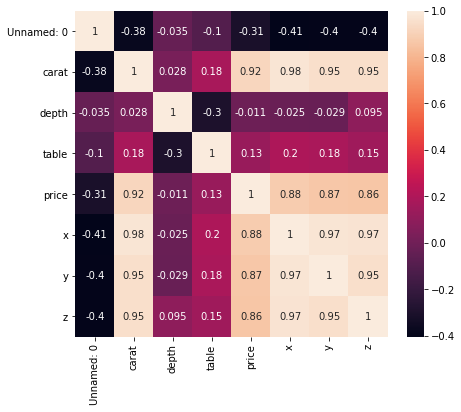

In [82]:
plt.figure(figsize=(7,6))
correlation = df_diamonds.corr()
sns.heatmap(correlation, annot=True)
plt.show()

### Pre Processamento

### Remove outliers

In [84]:
df_number_type = df_diamonds.select_dtypes(exclude='O').columns[1:]

def range_for_remove_outliers(attr):
    df_attr = df_diamonds[attr]
    q3 = df_attr.quantile(q=0.75)
    q1 = df_attr.quantile(q=0.25)
    
#     print(f"Q3 = {q3}")
#     print(f"Q1 = {q1}")
    IQR  = q3 - q1
    min_IQR = q1 - 1.5 * IQR
    max_IQR = q3 + 1.5 * IQR
    
    return (min_IQR,max_IQR)

def remove_outlier(df_in, col_name):
    range_iqr = range_for_remove_outliers(col_name)
    df_out = df_in[~((df_in < range_iqr[0]) |(df_in > range_iqr[1])).any(axis=1)]
    return df_out


df_diamonds_ro = remove_outlier(df_diamonds, df_number_type)
 
    
df_diamonds_ro.to_csv('datasets/diamonds_remove_outliers.csv',index=False)

<ipython-input-84-1b81e25557af>:18: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df_in[~((df_in < range_iqr[0]) |(df_in > range_iqr[1])).any(axis=1)]
<ipython-input-84-1b81e25557af>:18: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df_in[~((df_in < range_iqr[0]) |(df_in > range_iqr[1])).any(axis=1)]


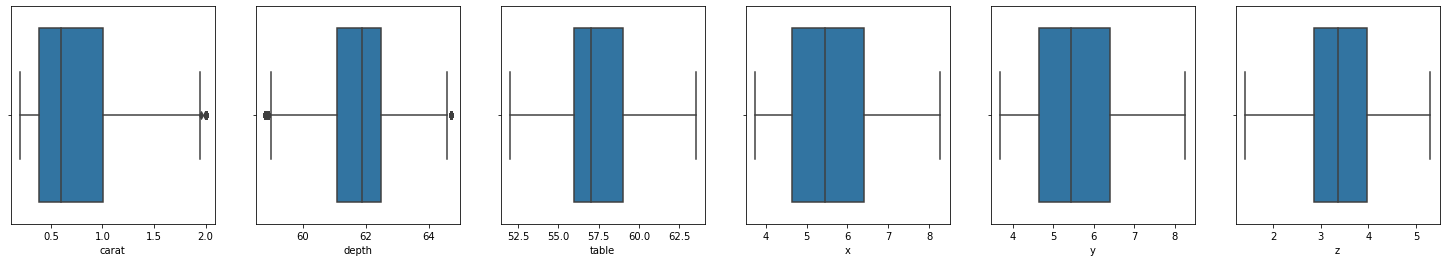

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt


df_number_type = df_diamonds_ro.select_dtypes(exclude='O')
df_without_price = df_number_type.drop("price", axis = 'columns')

plt.figure(figsize=(30,4))
for i,feature in enumerate(df_without_price.columns[1:].tolist(),1):
    plt.subplot(1,7,i)
    sns.boxplot(x=df_number_type[feature])

        
plt.show()

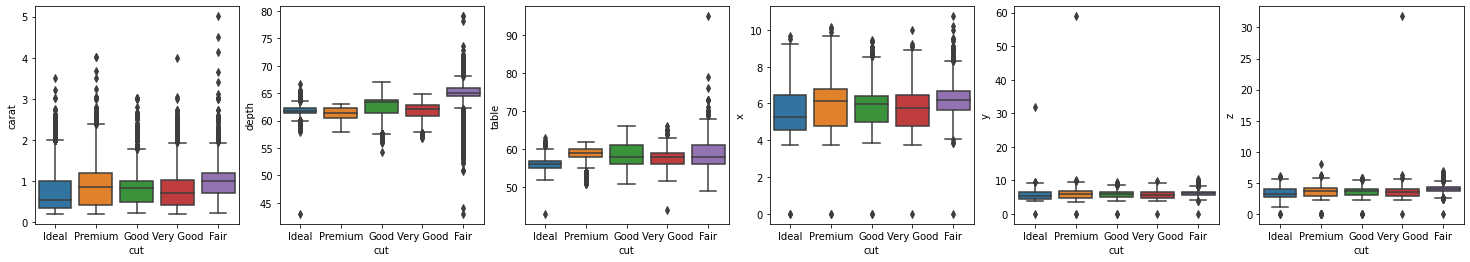

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt


df_number_type = df_diamonds.select_dtypes(exclude='O')
df_without_price = df_number_type.drop("price", axis = 'columns')

plt.figure(figsize=(30,4))
for i,feature in enumerate(df_without_price.columns[1:].tolist(),1):
    plt.subplot(1,7,i)
    sns.boxplot(x='cut',y=feature,data=df_diamonds)        
plt.show()

## Regressao linear

In [41]:
# Conver to X & y
df_number_type = df_diamonds.select_dtypes(exclude='O')
y=df_number_type['price']
X=df_number_type.drop('price', axis=1)


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.2, random_state=1)

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix


In [44]:
sc=StandardScaler()
X_train_tx=sc.fit_transform(X_train)
X_test_tx=sc.transform(X_test)

In [45]:
dataset_1=(X_train, X_test, y_train, y_test, 'dataset_1')

In [46]:
# Blank lists for all the details
model_=[]
cv_score_test=[]
cv_score_train=[]
mse_=[]
mae_=[]
rmse_=[]
r2_=[]

In [47]:
def run_model(model, dataset, modelname):
    model.fit(dataset[0], dataset[2])
    accuracies=cross_val_score(estimator=model, X=dataset[0], y=dataset[2], cv=5, verbose=1)
    y_pred=model.predict(dataset[1])
    print('')
    score_1=model.score(dataset[1], dataset[3])
    print(f'#### {modelname} ####')
    print("score :%.4f" %score_1)
    print(accuracies)
    
    
    mse=mean_squared_error(dataset[3], y_pred)
    mae=mean_absolute_error(dataset[3], y_pred)
    rmse=mean_squared_error(dataset[3], y_pred)**0.5
    r2=r2_score(dataset[3], y_pred)
   
    
    print('')
    print('MSE    : %0.2f ' % mse)
    print('MAE    : %0.2f ' % mae)
    print('RMSE   : %0.2f ' % rmse)
    print('R2     : %0.2f ' % r2)
    
    ## appending to the lists
    
    model_.append(modelname)
    cv_score_test.append(score_1)
    cv_score_train.append(np.mean(accuracies))
    mse_.append(mse)
    mae_.append(mae)
    rmse_.append(rmse)
    r2_.append(r2)

In [48]:
model_dict={'LinearRegression': LinearRegression(), 'LassoRegression': Lasso(normalize=True), 
             'AdaBoostRegressor': AdaBoostRegressor(n_estimators=1000),
            'RidgeRegression': Ridge(normalize=True),
            'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, verbose=1),
           'RandomForestRegressor': RandomForestRegressor(), 
           'KNeighborsRegressor': KNeighborsRegressor()
           }

In [49]:
run_model(model_dict['LinearRegression'], dataset_1, "LinearRegression")


#### LinearRegression ####
score :0.8611
[0.8508012  0.86313829 0.86698611 0.86094914 0.86214544]

MSE    : 1016587.99 
MAE    : 627.90 
RMSE   : 1008.26 
R2     : 0.86 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [50]:
for models in model_dict:
    run_model(model_dict[models], dataset_1, models)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



#### LinearRegression ####
score :0.8611
[0.8508012  0.86313829 0.86698611 0.86094914 0.86214544]

MSE    : 1016587.99 
MAE    : 627.90 
RMSE   : 1008.26 
R2     : 0.86 

#### LassoRegression ####
score :0.8464
[0.83652991 0.85047704 0.85303905 0.8483176  0.850578  ]

MSE    : 1124096.82 
MAE    : 670.40 
RMSE   : 1060.23 
R2     : 0.85 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   20.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



#### AdaBoostRegressor ####
score :0.9793
[0.98350546 0.9765242  0.98883963 0.98869266 0.9808983 ]

MSE    : 151290.96 
MAE    : 295.46 
RMSE   : 388.96 
R2     : 0.98 



[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


#### RidgeRegression ####
score :0.7947
[0.78219081 0.79485873 0.79873089 0.79380025 0.8007129 ]

MSE    : 1502376.56 
MAE    : 802.53 
RMSE   : 1225.71 
R2     : 0.79 
      Iter       Train Loss   Remaining Time 
         1     6608955.8487            6.84s
         2     5778629.2288            5.10s
         3     5094485.1894            4.75s
         4     4537333.2653            7.35s
         5     4073366.3847            6.99s
         6     3688814.0293            6.62s
         7     3358587.7776            5.98s
         8     3084406.9475            5.51s
         9     2833698.5514            5.11s
        10     2627866.4737            4.74s
        20     1508074.6955            3.83s
        30     1154391.3572            2.88s
        40     1023178.4660            2.14s
        50      933467.3673            1.62s
        60      865163.9840            1.19s
        70      812434.3460            0.84s
        80      771391.2804            0.54s
        90      7379

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


        20     1486606.4107            1.19s
        30     1133686.6009            1.06s
        40     1003875.9429            0.90s
        50      916233.5693            0.73s
        60      850501.7245            0.58s
        70      799601.0980            0.44s
        80      759722.5878            0.30s
        90      727891.9398            0.15s
       100      701883.5667            0.00s
      Iter       Train Loss   Remaining Time 
         1     6581341.2358            1.60s
         2     5754884.0265            1.45s
         3     5072861.6257            1.40s
         4     4518425.1041            1.36s
         5     4055430.1562            1.34s
         6     3672115.5273            1.32s
         7     3343539.2334            1.30s
         8     3071596.6889            1.28s
         9     2822008.1315            1.28s
        10     2618269.8517            1.30s
        20     1504180.4015            1.15s
        30     1152757.4760            0.98s
        4

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.0min finished



#### RandomForestRegressor ####
score :0.9998
[0.99968684 0.99963578 0.99969795 0.99975552 0.99983943]

MSE    : 1413.16 
MAE    : 6.53 
RMSE   : 37.59 
R2     : 1.00 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



#### KNeighborsRegressor ####
score :0.9947
[0.98901651 0.99019119 0.98773833 0.99005624 0.98970058]

MSE    : 38835.63 
MAE    : 25.94 
RMSE   : 197.07 
R2     : 0.99 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


In [51]:
accuracy_data=pd.DataFrame(zip(model_, cv_score_test, cv_score_train, mse_, mae_, rmse_, r2_), columns=['Model', 'CV Test score', 'CV Train score (mean)', '%%SVGean Squared error', 'Mean Absolute error', 'Root Mean Squared error', 'R2 Score'])

In [52]:
accuracy_data


,Model,CV Test score,CV Train score (mean),%%SVGean Squared error,Mean Absolute error,Root Mean Squared error,R2 Score
0,LinearRegression,0.861113,0.860804,1.016588e+06,627.898926,1008.259885,0.861113
1,LinearRegression,0.861113,0.860804,1.016588e+06,627.898926,1008.259885,0.861113
2,LassoRegression,0.846425,0.847788,1.124097e+06,670.402583,1060.234325,0.846425
3,AdaBoostRegressor,0.979330,0.983692,1.512910e+05,295.459234,388.961389,0.979330
4,RidgeRegression,0.794744,0.794059,1.502377e+06,802.530927,1225.714713,0.794744
5,GradientBoostingRegressor,0.906410,0.905306,6.850362e+05,533.697745,827.669156,0.906410
6,RandomForestRegressor,0.999807,0.999723,1.413161e+03,6.526968,37.592031,0.999807
7,KNeighborsRegressor,0.994694,0.989341,3.883563e+04,25.943104,197.067574,0.994694


['LinearRegression',
 'LinearRegression',
 'LassoRegression',
 'AdaBoostRegressor',
 'RidgeRegression',
 'GradientBoostingRegressor',
 'RandomForestRegressor',
 'KNeighborsRegressor']